#Regression Analysis



#Algoritma yang digunakan:

##Linear Regression

##Elastic Net
Elastic net is a penalized linear regression model that includes both the L1 and L2 penalties during training.

##Bayesian Ridge
Bayesian regression allows a natural mechanism to survive insufficient data or poorly distributed data by formulating linear regression using probability distributors rather than point estimates.

##Decision Tree Regression
The decision trees is used to fit a sine curve with addition noisy observation. As a result, it learns local linear regressions approximating the sine curve.
![Decision Tree Regressor](https://scikit-learn.org/stable/_images/sphx_glr_plot_tree_regression_001.png)

##Random Forest Regression
Random Forest builds decision trees on different samples and takes their average in case of regression.

##XGBoost Regression
XGBoost is a decision-tree-based ensemble Machine Learning algorithm that uses a gradient boosting framework.

##Support Vector Regression
Support Vector Regression uses the same principle as the SVMs. The basic idea behind SVR is to find the best fit line. In SVR, the best fit line is the hyperplane that has the maximum number of points.


In [3]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [1]:
# standard ML library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(rc={'figure.figsize':(20,18)})

# tambahan
import plotly.express as px

# Preprocess
from sklearn.preprocessing import Normalizer
from sklearn.decomposition import PCA
#import category_encoders as ce

# Tuning
from sklearn.model_selection import validation_curve, LeaveOneOut, cross_val_score, KFold, cross_validate, GridSearchCV
from sklearn.feature_selection import SelectKBest, SelectPercentile, chi2, SelectFromModel

# models
from sklearn.linear_model import Perceptron, LinearRegression, ElasticNet, BayesianRidge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost.sklearn import XGBRegressor
from sklearn.svm import SVR


##Data Import & Understanding

In [2]:
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows",1000) 

#read the data
data_url = 'https://github.com/audit-ti/pjj-pengolahan-data-python/raw/main/asset/train.csv'
data = pd.read_csv(data_url)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20401 entries, 0 to 20400
Data columns (total 61 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   id                         20401 non-null  int64  
 1   bond_id                    20401 non-null  int64  
 2   trade_price                20401 non-null  float64
 3   weight                     20401 non-null  float64
 4   current_coupon             20401 non-null  float64
 5   time_to_maturity           20401 non-null  float64
 6   is_callable                20401 non-null  int64  
 7   reporting_delay            20401 non-null  float64
 8   trade_size                 20401 non-null  int64  
 9   trade_type                 20401 non-null  int64  
 10  curve_based_price          20401 non-null  float64
 11  received_time_diff_last1   20401 non-null  int64  
 12  trade_price_last1          20401 non-null  float64
 13  trade_size_last1           20401 non-null  int

##Identifikasi Atribut Observasi

1. Weight=
2. Current Coupon= rate saat ini (relevan, berkaitan dengan harga secara langsung)
3. time to maturity= Jangka waktu sampai jatuh tempo obligasi (relevan)
4. is_callable = apakah bisa dilunasi sebelum jatuh tempo (relevan, berkaitan dengan kepastian dari sisi investor)
5. reporting delay = (sepertinya irrelevant)
6. trade size = 
7. trade type = tipe perdagangan, variabel dummy. kalau jenis obligasi maka relevan. harus dibuat encoding
8. curve based price = nilai obligasi berdasarkan yield (relevan)
9. variabel lampau antara lain:

*   received time diff last
*   trade price last
* trade size last
* trade type last
* curved based price last



In [3]:
data.head(20)

,id,bond_id,trade_price,weight,current_coupon,time_to_maturity,is_callable,reporting_delay,trade_size,trade_type,curve_based_price,received_time_diff_last1,trade_price_last1,trade_size_last1,trade_type_last1,curve_based_price_last1,received_time_diff_last2,trade_price_last2,trade_size_last2,trade_type_last2,curve_based_price_last2,received_time_diff_last3,trade_price_last3,trade_size_last3,trade_type_last3,curve_based_price_last3,received_time_diff_last4,trade_price_last4,trade_size_last4,trade_type_last4,curve_based_price_last4,received_time_diff_last5,trade_price_last5,trade_size_last5,trade_type_last5,curve_based_price_last5,received_time_diff_last6,trade_price_last6,trade_size_last6,trade_type_last6,curve_based_price_last6,received_time_diff_last7,trade_price_last7,trade_size_last7,trade_type_last7,curve_based_price_last7,received_time_diff_last8,trade_price_last8,trade_size_last8,trade_type_last8,curve_based_price_last8,received_time_diff_last9,trade_price_last9,trade_size_last9,trade_type_last9,curve_based_price_last9,received_time_diff_last10,trade_price_last10,trade_size_last10,trade_type_last10,curve_based_price_last10
0,1,62,108.692,0.478393,4.5,2.365027,0,2.007,75000,3,108.599191,1355,108.440,100000,2,108.583506,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,62,108.266,3.659075,4.5,2.362512,0,5.017,35000,2,108.609852,79328,108.692,75000,3,108.599191,80683.0,108.440,100000.0,2.0,108.583506,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,62,108.266,0.012991,4.5,2.362512,0,5.123,35000,4,108.609852,0,108.266,35000,2,108.609852,79328.0,108.692,75000.0,3.0,108.599191,80683.0,108.440,100000.0,2.0,108.583506,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,62,108.266,0.050315,4.5,2.362511,0,19.889,35000,4,108.609852,14,108.266,35000,4,108.609852,14.0,108.266,35000.0,2.0,108.609852,79342.0,108.692,75000.0,3.0,108.599191,80698.0,108.440,100000.0,2.0,108.583506,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,62,107.902,3.495358,4.5,2.360216,0,7.109,25000,2,108.607109,72388,108.266,35000,4,108.609852,72402.0,108.266,35000.0,4.0,108.609852,72403.0,108.266,35000.0,2.0,108.609852,151731.0,108.692,75000.0,3.0,108.599191,153086.0,108.440,100000.0,2.0,108.583506,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,6,62,107.902,0.012991,4.5,2.360216,0,7.213,25000,4,108.607109,0,107.902,25000,2,108.607109,72388.0,108.266,35000.0,4.0,108.609852,72403.0,108.266,35000.0,4.0,108.609852,72403.0,108.266,35000.0,2.0,108.609852,151731.0,108.692,75000.0,3.0,108.599191,153086.0,108.440,100000.0,2.0,108.583506,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,7,62,107.596,7.776989,4.5,2.348853,0,7.402,15000,2,108.516374,358353,107.902,25000,4,108.607109,358353.0,107.902,25000.0,2.0,108.607109,430741.0,108.266,35000.0,4.0,108.609852,430756.0,108.266,35000.0,4.0,108.609852,430756.0,108.266,35000.0,2.0,108.609852,510084.0,108.692,75000.0,3.0,108.599191,511439.0,108.440,100000.0,2.0,108.583506,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,8,62,107.863,0.029050,4.5,2.348852,0,12.378,15000,4,108.516374,4,107.596,15000,2,108.516374,358358.0,107.902,25000.0,4.0,108.607109,358358.0,107.902,25000.0,2.0,108.607109,430746.0,108.266,35000.0,4.0,108.609852,430761.0,108.266,35000.0,4.0,108.609852,430761.0,108.266,35000.0,2.0,108.609852,510089.0,108.692,75000.0,3.0,108.599191,511444.0,108.440,100000.0,2.0,108.583506,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,9,62,108.437,3.929823,4.5,2.345951,0,15.025,400000,3,108.385825,91502,107.863,15000,4,108.51637

List of bond ID

In [4]:
bond_list = list(data['bond_id'].unique())
print(bond_list)

[62, 106, 760, 781, 782, 1089, 1150, 2124, 2448, 3072, 3587, 3805, 4468, 4596, 4769, 5607, 5956, 6032, 6040, 6101, 6121, 6533, 7108, 7741, 8105, 8262, 8276, 8293, 8457, 8473, 8975, 9195, 9386, 9518, 9558, 9708, 10556, 11026, 11046, 11988, 12717, 14813, 15908, 16255, 16564, 16700, 16986, 17528, 18298, 18736, 19560, 19813, 19989, 21351, 21832, 22089, 22570, 22619, 22978, 23923, 24634, 25147, 25197, 25466, 25470, 25522, 25779, 25784, 27736, 28431, 29260, 197014, 347637, 347640, 348003, 348054, 348299, 654737, 654805, 656592, 657191, 657393, 658307, 660134, 660600, 661498, 874952, 876147, 901886, 915058]


In [5]:
#describe the data
description = data.describe().T
description['range'] = description['max']-description['min']
description

,count,mean,std,min,25%,50%,75%,max,range
id,20401.0,10201.000000,5889.405757,1.000000,5101.000000,10201.000000,15301.000000,2.040100e+04,2.040000e+04
bond_id,20401.0,262573.664330,279479.031019,62.000000,9386.000000,347637.000000,348003.000000,9.150580e+05,9.149960e+05
trade_price,20401.0,96.785716,22.575298,1.009000,97.125000,99.604000,104.115000,1.515550e+02,1.505460e+02
weight,20401.0,0.933051,2.160483,0.012991,0.031822,0.182805,0.670537,3.912420e+01,3.911120e+01
current_coupon,20401.0,5.525698,2.220366,0.676850,3.700000,5.050000,6.500000,1.200000e+01,1.132315e+01
time_to_maturity,20401.0,6.264332,5.113624,0.228170,3.529057,4.488734,7.775828,2.874642e+01,2.851825e+01
is_callable,20401.0,0.199892,0.399929,0.000000,0.000000,0.000000,0.000000,1.000000e+00,1.000000e+00
reporting_delay,20401.0,4712.839352,80750.031392,-4.508000,2.467000,9.180000,33.377000,5.201790e+06,5.201795e+06
trade_size,20401.0,219160.370962,661581.932940,1000.000000,10000.000000,25000.000000,100000.000000,5.000001e+06,4.999001e+06
trade_type,20401.0,3.275477,0.724495,2.000000,3.000000,3.000000,4.000000,4.000000e+00,2.000000e+00


##Missing data handling

In [6]:
null_preprocess=data.copy()
for i in range(10):
  cols = list(data.columns[data.columns.str.endswith("_last"+str(i+1))])
  conditions = [cols[x]+'!='+cols[x]+' or ' if x!=len(cols)-1 else cols[x]+'!='+cols[x] for x in range(len(cols))]
  query= "".join(conditions)
  empty = data.query(query).copy()
  empty['flag'] = i
  empty.head()
  if(i==0):
    null_preprocess=empty.copy()
  else:
    null_preprocess=pd.concat([null_preprocess,empty])
null_preprocess.head()

,id,bond_id,trade_price,weight,current_coupon,time_to_maturity,is_callable,reporting_delay,trade_size,trade_type,curve_based_price,received_time_diff_last1,trade_price_last1,trade_size_last1,trade_type_last1,curve_based_price_last1,received_time_diff_last2,trade_price_last2,trade_size_last2,trade_type_last2,curve_based_price_last2,received_time_diff_last3,trade_price_last3,trade_size_last3,trade_type_last3,curve_based_price_last3,received_time_diff_last4,trade_price_last4,trade_size_last4,trade_type_last4,curve_based_price_last4,received_time_diff_last5,trade_price_last5,trade_size_last5,trade_type_last5,curve_based_price_last5,received_time_diff_last6,trade_price_last6,trade_size_last6,trade_type_last6,curve_based_price_last6,received_time_diff_last7,trade_price_last7,trade_size_last7,trade_type_last7,curve_based_price_last7,received_time_diff_last8,trade_price_last8,trade_size_last8,trade_type_last8,curve_based_price_last8,received_time_diff_last9,trade_price_last9,trade_size_last9,trade_type_last9,curve_based_price_last9,received_time_diff_last10,trade_price_last10,trade_size_last10,trade_type_last10,curve_based_price_last10,flag
20253,20254,915058,99.391,3.028414,4.125,10.042333,0,58038.911,500000,2,99.122619,54339,99.432,1000001,2,NaN,54935.0,99.496,1000001.0,3.0,NaN,55818.0,99.432,1000000.0,3.0,NaN,55943.0,99.415,1000000.0,2.0,NaN,56012.0,99.327,500000.0,2.0,NaN,57681.0,98.988,100000.0,2.0,NaN,57772.0,99.31,500000.0,2.0,NaN,57823.0,99.359,1000001.0,2.0,NaN,57843.0,99.448,500000.0,2.0,NaN,57888.0,99.432,500000.0,2.0,NaN,0
0,1,62,108.692,0.478393,4.500,2.365027,0,2.007,75000,3,108.599191,1355,108.440,100000,2,108.583506,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
138,139,760,147.906,0.055118,8.500,18.077789,0,20.291,16000,3,149.045508,17,147.806,16000,4,149.045508,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
257,258,782,112.854,3.930188,7.875,2.529257,0,4.543,500000,2,113.243126,91519,112.355,90000,2,113.031622,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
464,465,2124,111.875,3.384174,7.375,7.833969,0,1.345,4000,4,112.201581,67856,112.560,1000001,3,112.219844,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1


In [7]:
null_preprocess[null_preprocess['flag']==2]

,id,bond_id,trade_price,weight,current_coupon,time_to_maturity,is_callable,reporting_delay,trade_size,trade_type,curve_based_price,received_time_diff_last1,trade_price_last1,trade_size_last1,trade_type_last1,curve_based_price_last1,received_time_diff_last2,trade_price_last2,trade_size_last2,trade_type_last2,curve_based_price_last2,received_time_diff_last3,trade_price_last3,trade_size_last3,trade_type_last3,curve_based_price_last3,received_time_diff_last4,trade_price_last4,trade_size_last4,trade_type_last4,curve_based_price_last4,received_time_diff_last5,trade_price_last5,trade_size_last5,trade_type_last5,curve_based_price_last5,received_time_diff_last6,trade_price_last6,trade_size_last6,trade_type_last6,curve_based_price_last6,received_time_diff_last7,trade_price_last7,trade_size_last7,trade_type_last7,curve_based_price_last7,received_time_diff_last8,trade_price_last8,trade_size_last8,trade_type_last8,curve_based_price_last8,received_time_diff_last9,trade_price_last9,trade_size_last9,trade_type_last9,curve_based_price_last9,received_time_diff_last10,trade_price_last10,trade_size_last10,trade_type_last10,curve_based_price_last10,flag
0,1,62,108.6920,0.478393,4.500,2.365027,0,2.007,75000,3,108.599191,1355,108.4400,100000,2,108.583506,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
1,2,62,108.2660,3.659075,4.500,2.362512,0,5.017,35000,2,108.609852,79328,108.6920,75000,3,108.599191,80683.0,108.4400,100000.0,2.0,108.583506,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
138,139,760,147.9060,0.055118,8.500,18.077789,0,20.291,16000,3,149.045508,17,147.8060,16000,4,149.045508,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
139,140,760,149.4760,0.242003,8.500,18.077778,0,12.450,16000,2,149.045508,346,147.9060,16000,3,149.045508,363.0,147.8060,16000.0,4.0,149.045508,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
257,258,782,112.8540,3.930188,7.875,2.529257,0,4.543,500000,2,113.243126,91519,112.3550,90000,2,113.031622,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
258,259,782,113.3500,0.648919,7.875,2.529178,0,6.639,10000,4,113.260230,2494,112.8540,500000,2,113.243126,94013.0,112.3550,90000.0,2.0,113.031622,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
464,465,2124,111.8750,3.384174,7.375,7.833969,0,1.345,4000,4,112.201581,67856,112.5600,1000001,3,112.219844,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
465,466,2124,112.1250,0.068744,7.375,7.833968,0,31.483,4000,3,112.201581,27,111.8750,4000,4,112.201581,67883.0,112.5600,1000001.0,3.0,112.219844,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
1346,1347,3072,101.5000,0.495038,1.750,0.995475,0,422356.349,1500000,3,101.494098,1451,101.4778,650000,2,101.494069,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
1347,1348,3072,101.5000,0.012991,1.750,0.995475,0,422357.262,1500000,3,101.494098,0,101.5000,1500000,3,101.494098,1452.0,101.4778,650000.0,2.0,101.494069,NaN,NaN,NaN,NaN,NaN,NaN

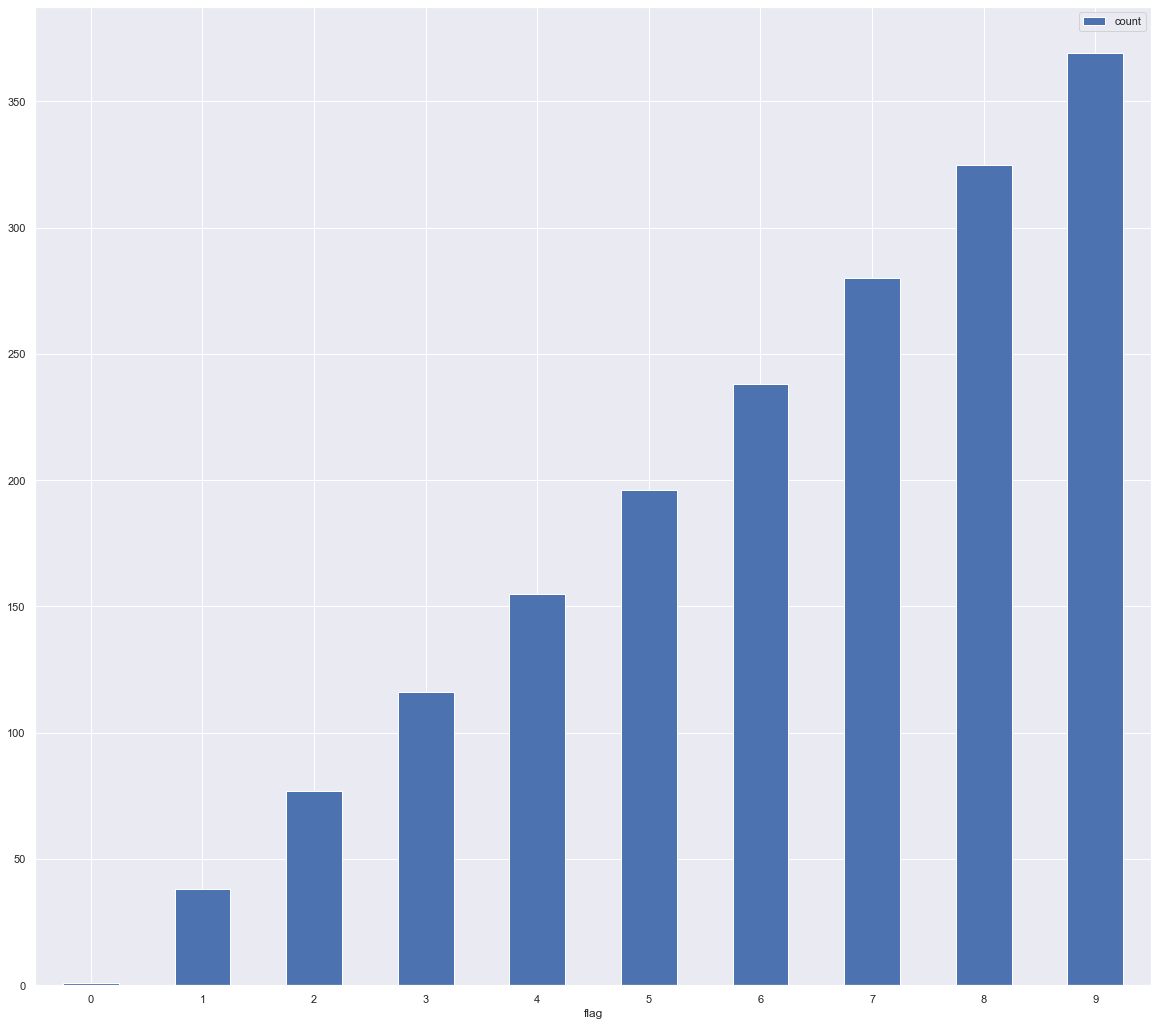

In [8]:
summary_null = null_preprocess.groupby(['flag']).count().reset_index()[['flag','id']]
summary_null['count'] = summary_null['id']
summary_null = summary_null[['flag','count']]
ax = summary_null.plot.bar(x='flag', y='count', rot=0)

Berdasarkan visualisasi di atas, diketahui bahwa data NAN terjadi karena trputusnya informasi data historis. Sehingga, salah satu opsi untuk melakukan imputasi adalah dengan mengisi data NaN tersebut dengan observasi berikutnya.

In [9]:
data_imputed = data.fillna(method='ffill')
data_imputed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20401 entries, 0 to 20400
Data columns (total 61 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   id                         20401 non-null  int64  
 1   bond_id                    20401 non-null  int64  
 2   trade_price                20401 non-null  float64
 3   weight                     20401 non-null  float64
 4   current_coupon             20401 non-null  float64
 5   time_to_maturity           20401 non-null  float64
 6   is_callable                20401 non-null  int64  
 7   reporting_delay            20401 non-null  float64
 8   trade_size                 20401 non-null  int64  
 9   trade_type                 20401 non-null  int64  
 10  curve_based_price          20401 non-null  float64
 11  received_time_diff_last1   20401 non-null  int64  
 12  trade_price_last1          20401 non-null  float64
 13  trade_size_last1           20401 non-null  int

In [10]:
column_all = list(description.index)
column_all

['id',
 'bond_id',
 'trade_price',
 'weight',
 'current_coupon',
 'time_to_maturity',
 'is_callable',
 'reporting_delay',
 'trade_size',
 'trade_type',
 'curve_based_price',
 'received_time_diff_last1',
 'trade_price_last1',
 'trade_size_last1',
 'trade_type_last1',
 'curve_based_price_last1',
 'received_time_diff_last2',
 'trade_price_last2',
 'trade_size_last2',
 'trade_type_last2',
 'curve_based_price_last2',
 'received_time_diff_last3',
 'trade_price_last3',
 'trade_size_last3',
 'trade_type_last3',
 'curve_based_price_last3',
 'received_time_diff_last4',
 'trade_price_last4',
 'trade_size_last4',
 'trade_type_last4',
 'curve_based_price_last4',
 'received_time_diff_last5',
 'trade_price_last5',
 'trade_size_last5',
 'trade_type_last5',
 'curve_based_price_last5',
 'received_time_diff_last6',
 'trade_price_last6',
 'trade_size_last6',
 'trade_type_last6',
 'curve_based_price_last6',
 'received_time_diff_last7',
 'trade_price_last7',
 'trade_size_last7',
 'trade_type_last7',
 'curve

In [11]:
def data_imputer(df):
  dataframe = df.copy()
  column_list = list(dataframe.columns)
  for i in range(len(dataframe)):
    for j in range(len(column_list)):
      if pd.isna(dataframe.iloc[i][column_list[j]]):
        dataframe.at[i,column_list[j]]=dataframe.iloc[i][column_list[j-5]]
  dataframe.info()
  return dataframe

In [12]:
imputer_test = data.copy()
imputer_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20401 entries, 0 to 20400
Data columns (total 61 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   id                         20401 non-null  int64  
 1   bond_id                    20401 non-null  int64  
 2   trade_price                20401 non-null  float64
 3   weight                     20401 non-null  float64
 4   current_coupon             20401 non-null  float64
 5   time_to_maturity           20401 non-null  float64
 6   is_callable                20401 non-null  int64  
 7   reporting_delay            20401 non-null  float64
 8   trade_size                 20401 non-null  int64  
 9   trade_type                 20401 non-null  int64  
 10  curve_based_price          20401 non-null  float64
 11  received_time_diff_last1   20401 non-null  int64  
 12  trade_price_last1          20401 non-null  float64
 13  trade_size_last1           20401 non-null  int

In [33]:
data_imputed = data_imputer(data)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20401 entries, 0 to 20400
Data columns (total 61 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   id                         20401 non-null  int64  
 1   bond_id                    20401 non-null  int64  
 2   trade_price                20401 non-null  float64
 3   weight                     20401 non-null  float64
 4   current_coupon             20401 non-null  float64
 5   time_to_maturity           20401 non-null  float64
 6   is_callable                20401 non-null  int64  
 7   reporting_delay            20401 non-null  float64
 8   trade_size                 20401 non-null  int64  
 9   trade_type                 20401 non-null  int64  
 10  curve_based_price          20401 non-null  float64
 11  received_time_diff_last1   20401 non-null  int64  
 12  trade_price_last1          20401 non-null  float64
 13  trade_size_last1           20401 non-null  int

In [34]:
data_imputed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20401 entries, 0 to 20400
Data columns (total 61 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   id                         20401 non-null  int64  
 1   bond_id                    20401 non-null  int64  
 2   trade_price                20401 non-null  float64
 3   weight                     20401 non-null  float64
 4   current_coupon             20401 non-null  float64
 5   time_to_maturity           20401 non-null  float64
 6   is_callable                20401 non-null  int64  
 7   reporting_delay            20401 non-null  float64
 8   trade_size                 20401 non-null  int64  
 9   trade_type                 20401 non-null  int64  
 10  curve_based_price          20401 non-null  float64
 11  received_time_diff_last1   20401 non-null  int64  
 12  trade_price_last1          20401 non-null  float64
 13  trade_size_last1           20401 non-null  int

#Feature Engineering

In [35]:
#generate column name
columns = list(description.index)
#remove target variable from column name list
columns.remove('trade_price')
#remove other irrelevant columns
columns.remove('id')
columns.remove('bond_id')
columns.remove('weight')
columns.remove('reporting_delay')
received_time_cols = list(data.columns[data.columns.str.startswith("received_time_diff_last")])
for i in received_time_cols:
  columns.remove(i)
print(columns)

['current_coupon', 'time_to_maturity', 'is_callable', 'trade_size', 'trade_type', 'curve_based_price', 'trade_price_last1', 'trade_size_last1', 'trade_type_last1', 'curve_based_price_last1', 'trade_price_last2', 'trade_size_last2', 'trade_type_last2', 'curve_based_price_last2', 'trade_price_last3', 'trade_size_last3', 'trade_type_last3', 'curve_based_price_last3', 'trade_price_last4', 'trade_size_last4', 'trade_type_last4', 'curve_based_price_last4', 'trade_price_last5', 'trade_size_last5', 'trade_type_last5', 'curve_based_price_last5', 'trade_price_last6', 'trade_size_last6', 'trade_type_last6', 'curve_based_price_last6', 'trade_price_last7', 'trade_size_last7', 'trade_type_last7', 'curve_based_price_last7', 'trade_price_last8', 'trade_size_last8', 'trade_type_last8', 'curve_based_price_last8', 'trade_price_last9', 'trade_size_last9', 'trade_type_last9', 'curve_based_price_last9', 'trade_price_last10', 'trade_size_last10', 'trade_type_last10', 'curve_based_price_last10']


In [76]:
#generate column name
columns_2 = list(description.index)
#remove target variable from column name list
columns_2.remove('trade_price')
#remove other irrelevant columns
columns_2.remove('id')
columns_2.remove('bond_id')
columns_2.remove('weight')

In [77]:
X_train_2 = data_imputed[columns_2]

In [36]:
X_train = data_imputed[columns]
Y_train = data_imputed[['trade_price']]

In [37]:
trade_type_columns = list(data.columns[data.columns.str.startswith("trade_type")])
print(trade_type_columns)

['trade_type', 'trade_type_last1', 'trade_type_last2', 'trade_type_last3', 'trade_type_last4', 'trade_type_last5', 'trade_type_last6', 'trade_type_last7', 'trade_type_last8', 'trade_type_last9', 'trade_type_last10']


In [38]:
def convert_tradetype(df,cols):
  result = df.copy()
  for i in cols:
    x = ['type2' if row==2 else ('type3' if row==3 else 'type4') for row in result[i]]
    result[i] = x
  return result

In [39]:
X_train_conv = convert_tradetype(X_train, trade_type_columns)
X_train_conv.head()

,current_coupon,time_to_maturity,is_callable,trade_size,trade_type,curve_based_price,trade_price_last1,trade_size_last1,trade_type_last1,curve_based_price_last1,trade_price_last2,trade_size_last2,trade_type_last2,curve_based_price_last2,trade_price_last3,trade_size_last3,trade_type_last3,curve_based_price_last3,trade_price_last4,trade_size_last4,trade_type_last4,curve_based_price_last4,trade_price_last5,trade_size_last5,trade_type_last5,curve_based_price_last5,trade_price_last6,trade_size_last6,trade_type_last6,curve_based_price_last6,trade_price_last7,trade_size_last7,trade_type_last7,curve_based_price_last7,trade_price_last8,trade_size_last8,trade_type_last8,curve_based_price_last8,trade_price_last9,trade_size_last9,trade_type_last9,curve_based_price_last9,trade_price_last10,trade_size_last10,trade_type_last10,curve_based_price_last10
0,4.5,2.365027,0,75000,type3,108.599191,108.440,100000,type2,108.583506,108.440,100000.0,type2,108.583506,108.440,100000.0,type2,108.583506,108.440,100000.0,type2,108.583506,108.44,100000.0,type2,108.583506,108.44,100000.0,type2,108.583506,108.44,100000.0,type2,108.583506,108.44,100000.0,type2,108.583506,108.44,100000.0,type2,108.583506,108.44,100000.0,type2,108.583506
1,4.5,2.362512,0,35000,type2,108.609852,108.692,75000,type3,108.599191,108.440,100000.0,type2,108.583506,108.440,100000.0,type2,108.583506,108.440,100000.0,type2,108.583506,108.44,100000.0,type2,108.583506,108.44,100000.0,type2,108.583506,108.44,100000.0,type2,108.583506,108.44,100000.0,type2,108.583506,108.44,100000.0,type2,108.583506,108.44,100000.0,type2,108.583506
2,4.5,2.362512,0,35000,type4,108.609852,108.266,35000,type2,108.609852,108.692,75000.0,type3,108.599191,108.440,100000.0,type2,108.583506,108.440,100000.0,type2,108.583506,108.44,100000.0,type2,108.583506,108.44,100000.0,type2,108.583506,108.44,100000.0,type2,108.583506,108.44,100000.0,type2,108.583506,108.44,100000.0,type2,108.583506,108.44,100000.0,type2,108.583506
3,4.5,2.362511,0,35000,type4,108.609852,108.266,35000,type4,108.609852,108.266,35000.0,type2,108.609852,108.692,75000.0,type3,108.599191,108.440,100000.0,type2,108.583506,108.44,100000.0,type2,108.583506,108.44,100000.0,type2,108.583506,108.44,100000.0,type2,108.583506,108.44,100000.0,type2,108.583506,108.44,100000.0,type2,108.583506,108.44,100000.0,type2,108.583506
4,4.5,2.360216,0,25000,type2,108.607109,108.266,35000,type4,108.609852,108.266,35000.0,type4,108.609852,108.266,35000.0,type2,108.609852,108.692,75000.0,type3,108.599191,108.44,100000.0,type2,108.583506,108.44,100000.0,type2,108.583506,108.44,100000.0,type2,108.583506,108.44,100000.0,type2,108.583506,108.44,100000.0,type2,108.583506,108.44,100000.0,type2,108.583506


In [40]:
#One Hot Encoding and normalization
def ohe_norm(df, cols):
  #OHE
  df_ohe = pd.get_dummies(df,columns=cols)
  result = df_ohe.copy()
  #normalisasi data
  norm = Normalizer()
  result = pd.DataFrame(norm.fit_transform(result), columns=df_ohe.columns,index=df_ohe.index)
  result.info()
  return result

In [41]:
data_to_process = X_train_conv.copy()
X_train_ON = ohe_norm(data_to_process,trade_type_columns)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20401 entries, 0 to 20400
Data columns (total 68 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   current_coupon            20401 non-null  float64
 1   time_to_maturity          20401 non-null  float64
 2   is_callable               20401 non-null  float64
 3   trade_size                20401 non-null  float64
 4   curve_based_price         20401 non-null  float64
 5   trade_price_last1         20401 non-null  float64
 6   trade_size_last1          20401 non-null  float64
 7   curve_based_price_last1   20401 non-null  float64
 8   trade_price_last2         20401 non-null  float64
 9   trade_size_last2          20401 non-null  float64
 10  curve_based_price_last2   20401 non-null  float64
 11  trade_price_last3         20401 non-null  float64
 12  trade_size_last3          20401 non-null  float64
 13  curve_based_price_last3   20401 non-null  float64
 14  trade_

In [109]:
#One Hot Encoding and normalization
def ohe_only(df, cols):
  #OHE
  df_ohe = pd.get_dummies(df,columns=cols)
  result = df_ohe.copy()
  return result

In [110]:
X_train_conv2 = convert_tradetype(X_train_2, trade_type_columns)
X_train_conv2.head()

,current_coupon,time_to_maturity,is_callable,reporting_delay,trade_size,trade_type,curve_based_price,received_time_diff_last1,trade_price_last1,trade_size_last1,trade_type_last1,curve_based_price_last1,received_time_diff_last2,trade_price_last2,trade_size_last2,trade_type_last2,curve_based_price_last2,received_time_diff_last3,trade_price_last3,trade_size_last3,trade_type_last3,curve_based_price_last3,received_time_diff_last4,trade_price_last4,trade_size_last4,trade_type_last4,curve_based_price_last4,received_time_diff_last5,trade_price_last5,trade_size_last5,trade_type_last5,curve_based_price_last5,received_time_diff_last6,trade_price_last6,trade_size_last6,trade_type_last6,curve_based_price_last6,received_time_diff_last7,trade_price_last7,trade_size_last7,trade_type_last7,curve_based_price_last7,received_time_diff_last8,trade_price_last8,trade_size_last8,trade_type_last8,curve_based_price_last8,received_time_diff_last9,trade_price_last9,trade_size_last9,trade_type_last9,curve_based_price_last9,received_time_diff_last10,trade_price_last10,trade_size_last10,trade_type_last10,curve_based_price_last10
0,4.5,2.365027,0,2.007,75000,type3,108.599191,1355,108.440,100000,type2,108.583506,1355.0,108.440,100000.0,type2,108.583506,1355.0,108.440,100000.0,type2,108.583506,1355.0,108.440,100000.0,type2,108.583506,1355.0,108.44,100000.0,type2,108.583506,1355.0,108.44,100000.0,type2,108.583506,1355.0,108.44,100000.0,type2,108.583506,1355.0,108.44,100000.0,type2,108.583506,1355.0,108.44,100000.0,type2,108.583506,1355.0,108.44,100000.0,type2,108.583506
1,4.5,2.362512,0,5.017,35000,type2,108.609852,79328,108.692,75000,type3,108.599191,80683.0,108.440,100000.0,type2,108.583506,80683.0,108.440,100000.0,type2,108.583506,80683.0,108.440,100000.0,type2,108.583506,80683.0,108.44,100000.0,type2,108.583506,80683.0,108.44,100000.0,type2,108.583506,80683.0,108.44,100000.0,type2,108.583506,80683.0,108.44,100000.0,type2,108.583506,80683.0,108.44,100000.0,type2,108.583506,80683.0,108.44,100000.0,type2,108.583506
2,4.5,2.362512,0,5.123,35000,type4,108.609852,0,108.266,35000,type2,108.609852,79328.0,108.692,75000.0,type3,108.599191,80683.0,108.440,100000.0,type2,108.583506,80683.0,108.440,100000.0,type2,108.583506,80683.0,108.44,100000.0,type2,108.583506,80683.0,108.44,100000.0,type2,108.583506,80683.0,108.44,100000.0,type2,108.583506,80683.0,108.44,100000.0,type2,108.583506,80683.0,108.44,100000.0,type2,108.583506,80683.0,108.44,100000.0,type2,108.583506
3,4.5,2.362511,0,19.889,35000,type4,108.609852,14,108.266,35000,type4,108.609852,14.0,108.266,35000.0,type2,108.609852,79342.0,108.692,75000.0,type3,108.599191,80698.0,108.440,100000.0,type2,108.583506,80698.0,108.44,100000.0,type2,108.583506,80698.0,108.44,100000.0,type2,108.583506,80698.0,108.44,100000.0,type2,108.583506,80698.0,108.44,100000.0,type2,108.583506,80698.0,108.44,100000.0,type2,108.583506,80698.0,108.44,100000.0,type2,108.583506
4,4.5,2.360216,0,7.109,25000,type2,108.607109,72388,108.266,35000,type4,108.609852,72402.0,108.266,35000.0,type4,108.609852,72403.0,108.266,35000.0,type2,108.609852,151731.0,108.692,75000.0,type3,108.599191,153086.0,108.44,100000.0,type2,108.583506,153086.0,108.44,100000.0,type2,108.583506,153086.0,108.44,100000.0,type2,108.583506,153086.0,108.44,100000.0,type2,108.583506,153086.0,108.44,100000.0,type2,108.583506,153086.0,108.44,100000.0,type2,108.583506


In [111]:
data_to_ohe = X_train_conv2.copy()
X_train_OHE = ohe_only(data_to_ohe,trade_type_columns)

In [46]:
dataset = X_train_ON.copy()

In [47]:
dataset['trade_price'] = Y_train
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20401 entries, 0 to 20400
Data columns (total 69 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   current_coupon            20401 non-null  float64
 1   time_to_maturity          20401 non-null  float64
 2   is_callable               20401 non-null  float64
 3   trade_size                20401 non-null  float64
 4   curve_based_price         20401 non-null  float64
 5   trade_price_last1         20401 non-null  float64
 6   trade_size_last1          20401 non-null  float64
 7   curve_based_price_last1   20401 non-null  float64
 8   trade_price_last2         20401 non-null  float64
 9   trade_size_last2          20401 non-null  float64
 10  curve_based_price_last2   20401 non-null  float64
 11  trade_price_last3         20401 non-null  float64
 12  trade_size_last3          20401 non-null  float64
 13  curve_based_price_last3   20401 non-null  float64
 14  trade_

In [48]:
dataset.corr().style.background_gradient(cmap='coolwarm')

,current_coupon,time_to_maturity,is_callable,trade_size,curve_based_price,trade_price_last1,trade_size_last1,curve_based_price_last1,trade_price_last2,trade_size_last2,curve_based_price_last2,trade_price_last3,trade_size_last3,curve_based_price_last3,trade_price_last4,trade_size_last4,curve_based_price_last4,trade_price_last5,trade_size_last5,curve_based_price_last5,trade_price_last6,trade_size_last6,curve_based_price_last6,trade_price_last7,trade_size_last7,curve_based_price_last7,trade_price_last8,trade_size_last8,curve_based_price_last8,trade_price_last9,trade_size_last9,curve_based_price_last9,trade_price_last10,trade_size_last10,curve_based_price_last10,trade_type_type2,trade_type_type3,trade_type_type4,trade_type_last1_type2,trade_type_last1_type3,trade_type_last1_type4,trade_type_last2_type2,trade_type_last2_type3,trade_type_last2_type4,trade_type_last3_type2,trade_type_last3_type3,trade_type_last3_type4,trade_type_last4_type2,trade_type_last4_type3,trade_type_last4_type4,trade_type_last5_type2,trade_type_last5_type3,trade_type_last5_type4,trade_type_last6_type2,trade_type_last6_type3,trade_type_last6_type4,trade_type_last7_type2,trade_type_last7_type3,trade_type_last7_type4,trade_type_last8_type2,trade_type_last8_type3,trade_type_last8_type4,trade_type_last9_type2,trade_type_last9_type3,trade_type_last9_type4,trade_type_last10_type2,trade_type_last10_type3,trade_type_last10_type4,trade_price
current_coupon,1.000000,0.761161,0.739741,0.111449,0.839481,0.838123,0.106697,0.839523,0.838264,0.102949,0.839566,0.838402,0.100160,0.839616,0.838455,0.097184,0.839662,0.838574,0.097305,0.839703,0.838713,0.097348,0.839742,0.838749,0.096239,0.839782,0.838789,0.095665,0.839828,0.838909,0.098067,0.839870,0.839032,0.106576,0.839897,0.265711,0.607785,0.512794,0.256107,0.603960,0.522973,0.258495,0.587523,0.540505,0.258392,0.588066,0.540387,0.268200,0.552731,0.570388,0.258691,0.565003,0.563738,0.261885,0.574542,0.553094,0.261662,0.569594,0.558513,0.269642,0.567751,0.556071,0.270692,0.568516,0.554053,0.272282,0.560891,0.560634,-0.179571
time_to_maturity,0.761161,1.000000,0.650480,0.103456,0.729505,0.727397,0.098497,0.729459,0.727159,0.095061,0.729473,0.727095,0.095098,0.729457,0.727122,0.092751,0.729401,0.727115,0.094454,0.729377,0.727230,0.095034,0.729335,0.727161,0.093750,0.729356,0.727136,0.094034,0.729396,0.727170,0.095384,0.729430,0.727252,0.101117,0.729379,0.368870,0.412154,0.393770,0.367471,0.420336,0.387443,0.377058,0.426345,0.377060,0.375298,0.423358,0.381241,0.384725,0.411630,0.388050,0.375766,0.421323,0.385101,0.380557,0.436860,0.367489,0.380980,0.433848,0.370655,0.392276,0.435988,0.361427,0.387458,0.435210,0.363440,0.391483,0.421451,0.373853,-0.019050
is_callable,0.739741,0.650480,1.000000,0.049934,0.494557,0.493864,0.054363,0.494356,0.494043,0.057086,0.494182,0.494294,0.057546,0.494142,0.494594,0.056649,0.494123,0.494891,0.055377,0.494147,0.495267,0.055259,0.494211,0.495497,0.054527,0.494311,0.495675,0.054629,0.494400,0.495860,0.055712,0.494480,0.496066,0.059458,0.494572,0.258287,0.442302,0.235661,0.270129,0.453850,0.221006,0.271630,0.469625,0.212838,0.271845,0.474987,0.209342,0.275350,0.484178,0.210024,0.261860,0.488920,0.211023,0.252617,0.496287,0.207167,0.258336,0.500939,0.203211,0.264388,0.499567,0.200675,0.269640,0.493913,0.199707,0.270095,0.497465,0.198542,-0.230459
trade_size,0.111449,0.103456,0.049934,1.000000,0.123675,0.123514,0.214272,0.123688,0.123378,-0.004635,0.123673,0.123383,-0.072431,0.123666,0.123465,-0.095260,0.123671,0.123393,-0.105107,0.123665,0.123327,-0.111826,0.123660,0.123317,-0.114187,0.123629,0.123254,-0.127023,0.123624,0.123141,-0.127487,0.123591,0.123109,-0.112706,0.123553,0.056097,0.050532,0.091896,0.041931,0.067856,0.081110,0.051151,0.070825,0.072683,0.046994,0.068139,0.077507,0.038926,0.072372,0.077849,0.044154,0.064898,0.081801,0.037700,0.067402,0.082992,0.039389,0.070594,0.079171,0.042533,0.072878,0.075439,0.044157,0.064401,0.082187,0.042618,0.064658,0.082697,-0.011415
curve_based_price,0.83948

#Model Selection

Untuk pemilihan model, digunakan KFold yang akan menguji performa masing-masing algoritma. KFold cross validation akan membagi train dataset dan test dataset menjadi beberapa sample group (biasa disebut fold) dengan ukuran proporsi data yang sama lalu dilakukan iterasi untuk mentrain model dan menilai performa model hasil training. Setiap iterasi training, digunakan dataset train dan validasi yang berbeda sehingga memberikan indikasi yang lebih baik atas kemampuan model dalam bekerja pada data yang baru.

In [43]:
#initiate models and setting kfold cross validation

linreg = LinearRegression()
bayes_ridge = BayesianRidge()
elastic_net = ElasticNet()
dtree = DecisionTreeRegressor()
random_forest = RandomForestRegressor()
xgb = XGBRegressor()
svr = SVR()

register_model = [
                  ('LR',linreg),
                  ('BR',bayes_ridge),
                  ('EN',elastic_net),
                  ('DT',dtree),
                  ('RF',random_forest),
                  ('XGB',xgb),
                  ('SVR',svr)
]
folds = KFold(n_splits = 15, shuffle = True, random_state = 100)

In [44]:
def model_selection(x_train,y_train,scoring,models,cv):
  data = {}
  for i in models:
    score = cross_validate(i[1],x_train,y_train,scoring=scoring,cv=cv,return_train_score=True)
    data[i[0]+' Train'] = score['train_score']
    data[i[0]+' Test'] = score['test_score']
  score_df = pd.DataFrame(data=data)
  plot = sns.boxplot(data = score_df, linewidth=2.5)
  return score_df.mean()

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using r

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using r

LR Train     -8.943459
LR Test      -8.992889
BR Train    -11.873953
BR Test     -11.881985
EN Train    -11.896029
EN Test     -11.896935
DT Train     -0.000003
DT Test      -5.049763
RF Train     -1.420149
RF Test      -3.782062
XGB Train    -1.923993
XGB Test     -3.251554
SVR Train   -10.989665
SVR Test    -11.025707
dtype: float64

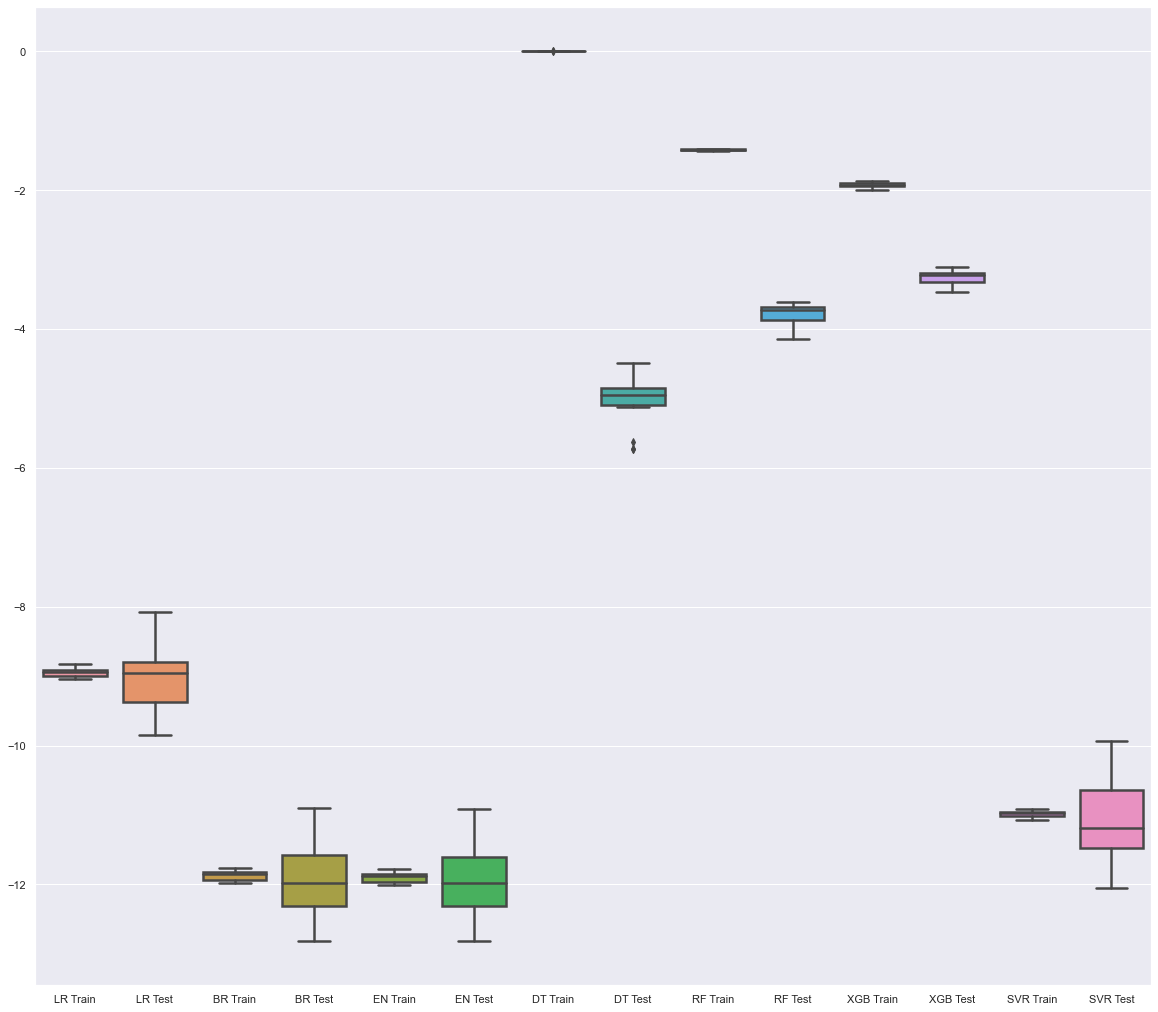

In [45]:
model_selection(X_train_ON, Y_train, 'neg_mean_absolute_error',register_model,folds)

#Fit the Model

So far, RF and XGB has the best and most stable result. Next step is hyperparameter tuning for RF and XGB.

Both can be combined if algorithm stacking were to be implemented.

1st attempt, using RF on preprocessed features

In [51]:
rf_params = {
            "max_features" : ["auto", "sqrt", "log2"],
            "min_samples_split": [2,4,8],
            "bootstrap": [True, False],
            'max_depth': range(3,7),
            'n_estimators': (10, 50, 100, 1000),
        }

gsc = GridSearchCV(
        estimator=RandomForestRegressor(),
        param_grid=rf_params,
    cv=5, scoring='neg_mean_absolute_error', verbose=0,
    n_jobs=-1)

#fit the grid search cross validation
grid_result = gsc.fit(X_train_ON, Y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:880: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


NameError: name 'rf_gs' is not defined

In [52]:
#retrieve model with the best parameter
rf_model_best = grid_result.best_estimator_
#check best parameter value
print(grid_result.best_params_)

{'bootstrap': True, 'max_depth': 6, 'max_features': 'log2', 'min_samples_split': 2, 'n_estimators': 10}


2nd attempt using XGB on preprocessed features

In [63]:
xgb_params = {"subsample":[0.5, 0.75, 1],
              "colsample_bytree":[0.5, 0.75, 1],
              "max_depth":[2, 6, 12],
              "min_child_weight":[1,5,15],
              "learning_rate":[0.3, 0.1, 0.03],
              "n_estimators":[100]}

gsc_xgb = GridSearchCV(
        estimator=XGBRegressor(),
        param_grid=xgb_params,
    cv=5, scoring='neg_mean_absolute_error', verbose=0,
    n_jobs=-1)

#fit the grid search cross validation
xgb_gs = gsc_xgb.fit(X_train_ON, Y_train)

#retrieve model with the best parameter
xgb_model_best = xgb_gs.best_estimator_
#check best parameter value
print(xgb_gs.best_params_)

{'colsample_bytree': 0.5, 'learning_rate': 0.3, 'max_depth': 6, 'min_child_weight': 15, 'n_estimators': 100, 'subsample': 1}


3rd attempt using XGB on raw features

In [68]:
#using unnormalized data
#fit the grid search cross validation
xgb_gs_raw = gsc_xgb.fit(X_train, Y_train)

#retrieve model with the best parameter
xgb_model_best_raw = xgb_gs_raw.best_estimator_
#check best parameter value
print(xgb_gs_raw.best_params_)

{'colsample_bytree': 1, 'learning_rate': 0.1, 'max_depth': 12, 'min_child_weight': 1, 'n_estimators': 100, 'subsample': 1}


4th attempt using Linreg on preprocessed features

In [72]:
linreg_model = linreg.fit(X_train_ON, Y_train)

5th attempt using XGB on raw features with additional features

In [78]:
#using unnormalized data
#fit the grid search cross validation
xgb_gs_raw2 = gsc_xgb.fit(X_train_2, Y_train)



NameError: name 'xgb_gs_raw_2' is not defined

In [81]:
#retrieve model with the best parameter
xgb_model_best_raw_2 = xgb_gs_raw2.best_estimator_
#check best parameter value
print(xgb_gs_raw2.best_params_)

{'colsample_bytree': 0.75, 'learning_rate': 0.1, 'max_depth': 12, 'min_child_weight': 1, 'n_estimators': 100, 'subsample': 0.5}


Grid search linear regression

In [107]:
folds = KFold(n_splits = 5, shuffle = True, random_state = 100)
parameters = {'fit_intercept':[True,False], 'normalize':[True,False], 'copy_X':[True, False]}

gsc_linreg = GridSearchCV(
        estimator=linreg,
    param_grid=parameters,scoring='neg_mean_absolute_error', verbose=0,
    n_jobs=-1)

#fit the grid search cross validation
linreg_gs = gsc_linreg.fit(X_train_2, Y_train)

#retrieve model with the best parameter
linreg_model_best = linreg_gs.best_estimator_
#check best parameter value
print(linreg_gs.best_params_)

{'copy_X': True, 'fit_intercept': False, 'normalize': True}


Grid search linear regression using OHE-ed data

In [112]:
#fit the grid search cross validation
linreg_gs_ohe = gsc_linreg.fit(X_train_OHE, Y_train)

#retrieve model with the best parameter
linreg_model_best_ohe = linreg_gs_ohe.best_estimator_
#check best parameter value
print(linreg_gs_ohe.best_params_)

{'copy_X': True, 'fit_intercept': False, 'normalize': True}


In [115]:
#using unnormalized data
#fit the grid search cross validation
xgb_gs_raw2_OHE = gsc_xgb.fit(X_train_OHE, Y_train)

#retrieve model with the best parameter
xgb_model_best_raw_2_OHE = xgb_gs_raw2_OHE.best_estimator_
#check best parameter value
print(xgb_gs_raw2_OHE.best_params_)

{'colsample_bytree': 0.75, 'learning_rate': 0.1, 'max_depth': 12, 'min_child_weight': 1, 'n_estimators': 100, 'subsample': 0.5}


#Load Test Data

In [54]:
test_url = 'https://github.com/audit-ti/pjj-pengolahan-data-python/raw/main/asset/test.csv'
data_test = pd.read_csv(test_url)
test_index = data_test[['id']]

In [85]:
data_test_imputed = data_imputer(data_test)
data_test_imputed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2060 entries, 0 to 2059
Data columns (total 59 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   id                         2060 non-null   int64  
 1   weight                     2060 non-null   float64
 2   current_coupon             2060 non-null   float64
 3   time_to_maturity           2060 non-null   float64
 4   is_callable                2060 non-null   int64  
 5   reporting_delay            2060 non-null   float64
 6   trade_size                 2060 non-null   int64  
 7   trade_type                 2060 non-null   int64  
 8   curve_based_price          2060 non-null   float64
 9   received_time_diff_last1   2060 non-null   int64  
 10  trade_price_last1          2060 non-null   float64
 11  trade_size_last1           2060 non-null   int64  
 12  trade_type_last1           2060 non-null   int64  
 13  curve_based_price_last1    2060 non-null   float

##process test data

In [86]:
X_test = data_test_imputed[columns]

In [87]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2060 entries, 0 to 2059
Data columns (total 46 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   current_coupon            2060 non-null   float64
 1   time_to_maturity          2060 non-null   float64
 2   is_callable               2060 non-null   int64  
 3   trade_size                2060 non-null   int64  
 4   trade_type                2060 non-null   int64  
 5   curve_based_price         2060 non-null   float64
 6   trade_price_last1         2060 non-null   float64
 7   trade_size_last1          2060 non-null   int64  
 8   trade_type_last1          2060 non-null   int64  
 9   curve_based_price_last1   2060 non-null   float64
 10  trade_price_last2         2060 non-null   float64
 11  trade_size_last2          2060 non-null   float64
 12  trade_type_last2          2060 non-null   float64
 13  curve_based_price_last2   2060 non-null   float64
 14  trade_pr

In [102]:
X_test_2 = data_test_imputed[columns_2]

In [88]:
X_test_conv = convert_tradetype(X_test, trade_type_columns)
X_test_conv.head()

,current_coupon,time_to_maturity,is_callable,trade_size,trade_type,curve_based_price,trade_price_last1,trade_size_last1,trade_type_last1,curve_based_price_last1,trade_price_last2,trade_size_last2,trade_type_last2,curve_based_price_last2,trade_price_last3,trade_size_last3,trade_type_last3,curve_based_price_last3,trade_price_last4,trade_size_last4,trade_type_last4,curve_based_price_last4,trade_price_last5,trade_size_last5,trade_type_last5,curve_based_price_last5,trade_price_last6,trade_size_last6,trade_type_last6,curve_based_price_last6,trade_price_last7,trade_size_last7,trade_type_last7,curve_based_price_last7,trade_price_last8,trade_size_last8,trade_type_last8,curve_based_price_last8,trade_price_last9,trade_size_last9,trade_type_last9,curve_based_price_last9,trade_price_last10,trade_size_last10,trade_type_last10,curve_based_price_last10
0,6.00,3.521154,0,100000,type3,100.913156,101.225,20000,type3,100.927761,101.225,10000.0,type3,100.931174,102.2460,15000.0,type3,100.931174,102.249,20000.0,type3,100.931174,101.035,5000.0,type4,100.882173,101.2350,5000.0,type3,100.882173,101.035,5000.0,type4,100.882173,101.0040,240000.0,type4,100.882173,101.254,240000.0,type3,100.882173,101.004,240000.0,type4,100.882173
1,3.20,3.241684,0,5000,type4,105.798081,104.139,5000,type4,105.798081,104.139,5000.0,type2,105.798081,105.5740,5000.0,type2,105.763216,105.824,75000.0,type2,105.653214,105.788,50000.0,type2,105.640738,106.0047,2000.0,type4,105.642134,106.072,25000.0,type3,105.640769,105.9889,50000.0,type3,105.603379,106.827,25000.0,type3,105.703122,105.848,100000.0,type4,105.669891
2,5.50,9.195348,1,12000,type3,93.658147,94.046,10000,type4,93.717506,95.738,10000.0,type3,93.710722,95.5380,40000.0,type3,93.710722,94.038,50000.0,type4,93.710722,95.448,50000.0,type3,93.710722,94.0380,50000.0,type4,93.710722,94.092,9000.0,type4,93.698056,95.7850,9000.0,type3,93.698056,94.069,7000.0,type4,93.698056,95.762,7000.0,type3,93.698056
3,4.95,1.148871,0,80000,type2,104.318609,104.360,100000,type2,104.318609,104.360,100000.0,type4,104.318609,104.2697,80000.0,type4,104.349750,104.603,100000.0,type3,104.349082,104.410,100000.0,type4,104.349082,104.3740,100000.0,type4,104.347692,104.371,5000.0,type4,104.376476,104.3810,5000.0,type4,104.388942,103.181,5000.0,type2,104.388942,104.516,20000.0,type4,104.387958
4,4.75,8.132487,0,20000,type3,108.196294,106.210,50000,type4,108.145867,106.158,20000.0,type3,107.750158,106.2580,1600000.0,type3,108.178792,106.838,15000.0,type3,108.559550,106.438,15000.0,type4,108.559550,105.7350,250000.0,type2,108.307196,106.890,50000.0,type4,108.591274,106.9270,50000.0,type3,108.591274,106.290,15000.0,type4,108.481265,106.290,15000.0,type3,108.481265


In [89]:
test_data_to_process = X_test_conv.copy()
X_test_ON = ohe_norm(test_data_to_process,trade_type_columns)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2060 entries, 0 to 2059
Data columns (total 68 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   current_coupon            2060 non-null   float64
 1   time_to_maturity          2060 non-null   float64
 2   is_callable               2060 non-null   float64
 3   trade_size                2060 non-null   float64
 4   curve_based_price         2060 non-null   float64
 5   trade_price_last1         2060 non-null   float64
 6   trade_size_last1          2060 non-null   float64
 7   curve_based_price_last1   2060 non-null   float64
 8   trade_price_last2         2060 non-null   float64
 9   trade_size_last2          2060 non-null   float64
 10  curve_based_price_last2   2060 non-null   float64
 11  trade_price_last3         2060 non-null   float64
 12  trade_size_last3          2060 non-null   float64
 13  curve_based_price_last3   2060 non-null   float64
 14  trade_pr

In [113]:
X_test_conv2 = convert_tradetype(X_test_2, trade_type_columns)
test_data_to_ohe = X_test_conv2.copy()
X_test_OHE = ohe_only(test_data_to_ohe,trade_type_columns)

# Predict Data Test

1. Using Random Forest

In [90]:
rf_prediction_result = rf_model_best.predict(X_test_ON)

In [91]:
rf_result = test_index.copy()
rf_result['trade_price'] = rf_prediction_result

##Export Results

In [92]:
rf_result.to_csv('X01_submission_RF.csv',index=False)

2. Using XGBoost

In [93]:
xgb_prediction_result = xgb_model_best.predict(X_test_ON)

In [94]:
xgb_result = test_index.copy()
xgb_result['trade_price'] = xgb_prediction_result

In [95]:
xgb_result.to_csv('X02_submission_XGB.csv',index=False)

3. Using XGBoost on raw train data

In [96]:
xgb_raw_prediction_result = xgb_model_best_raw.predict(X_test)

In [97]:
xgb_result_raw = test_index.copy()
xgb_result_raw['trade_price'] = xgb_raw_prediction_result

In [98]:
xgb_result_raw.to_csv('X03_submission_XGB_raw.csv',index=False)

4. Using Linear Regression on Normalized data

In [73]:
linreg_prediction_result = linreg_model.predict(X_test_ON)

In [74]:
linreg_result = test_index.copy()
linreg_result['trade_price'] = linreg_prediction_result

In [75]:
linreg_result.to_csv('04_submission_LinReg.csv',index=False)

5. Using XGBoost on raw data with additional columns

In [103]:
xgb_raw2_prediction_result = xgb_model_best_raw_2.predict(X_test_2)
xgb_result_raw2 = test_index.copy()
xgb_result_raw2['trade_price'] = xgb_raw2_prediction_result
xgb_result_raw2.to_csv('05_submission_XGB_raw2.csv',index=False)

6. Using Linreg on raw data with additional columns and cross validation

In [108]:
linreg_raw2_prediction_result = linreg_model_best.predict(X_test_2)
linreg_result_raw2 = test_index.copy()
linreg_result_raw2['trade_price'] = linreg_raw2_prediction_result
linreg_result_raw2.to_csv('06_submission_linreg_raw2.csv',index=False)

7. Using Linreg on raw data with grid search CV and OHE

In [114]:
linreg_raw2_OHE_prediction_result = linreg_model_best_ohe.predict(X_test_OHE)
linreg_result_raw2_OHE = test_index.copy()
linreg_result_raw2_OHE['trade_price'] = linreg_raw2_OHE_prediction_result
linreg_result_raw2_OHE.to_csv('07_submission_linreg_raw2_OHE.csv',index=False)

8. Using XGB on raw data with OHE

In [116]:
xgb_raw2_prediction_result_OHE = xgb_model_best_raw_2_OHE.predict(X_test_OHE)
xgb_result_raw2_OHE = test_index.copy()
xgb_result_raw2_OHE['trade_price'] = xgb_raw2_prediction_result_OHE
xgb_result_raw2_OHE.to_csv('08_submission_XGB_raw2_OHE.csv',index=False)